In [1]:
import numpy as np
import pandas as pd
import seaborn as sb 
import statsmodels 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
df=pd.read_csv('C:\\Users\\kanaw\\Desktop\\Fish.csv') 
df.head() 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [3]:
df.shape #rows,columns

(159, 7)

In [4]:
df.size #rows*columns

1113

In [5]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.index

RangeIndex(start=0, stop=159, step=1)

In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<Axes: xlabel='Length1', ylabel='Weight'>

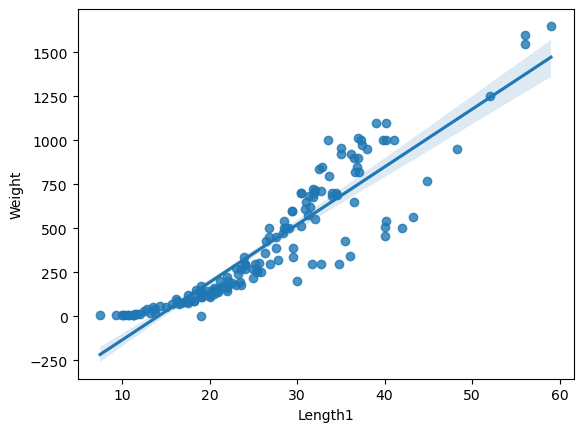

In [8]:
sb.regplot(x='Length1',y='Weight',data=df)

<Axes: xlabel='Length2', ylabel='Weight'>

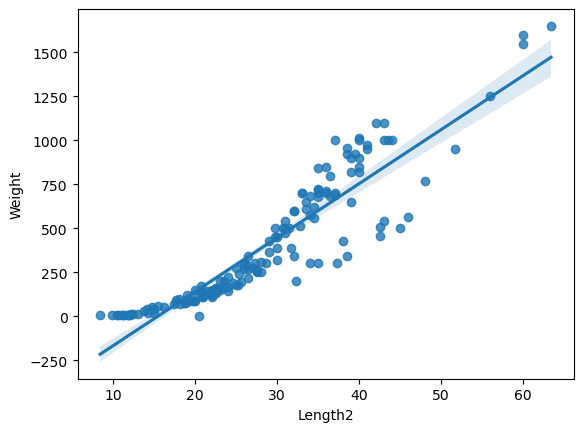

In [9]:
sb.regplot(x='Length2',y='Weight',data=df)

<Axes: xlabel='Length3', ylabel='Weight'>

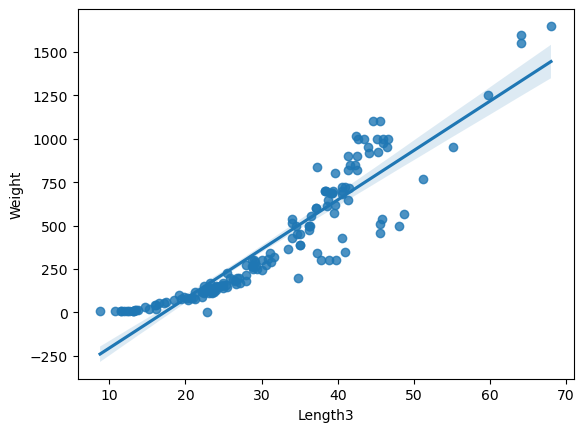

In [10]:
sb.regplot(x='Length3',y='Weight',data=df)

<Axes: xlabel='Height', ylabel='Weight'>

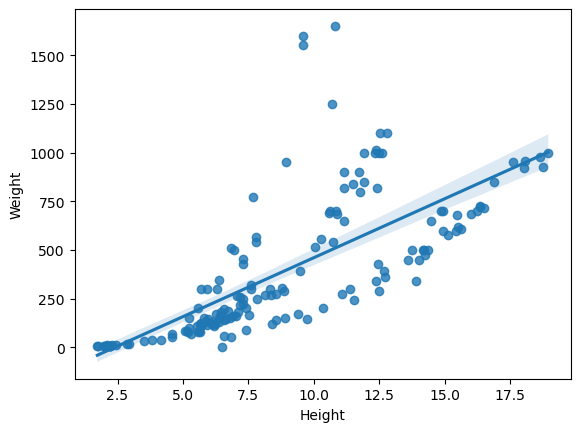

In [11]:
sb.regplot(x='Height',y='Weight',data=df)

<Axes: xlabel='Width', ylabel='Weight'>

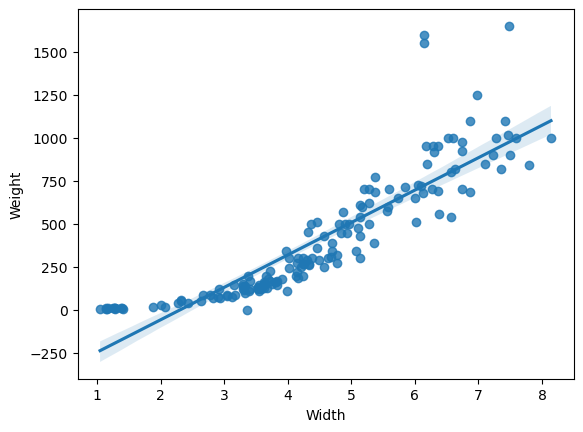

In [12]:
sb.regplot(x='Width',y='Weight',data=df)

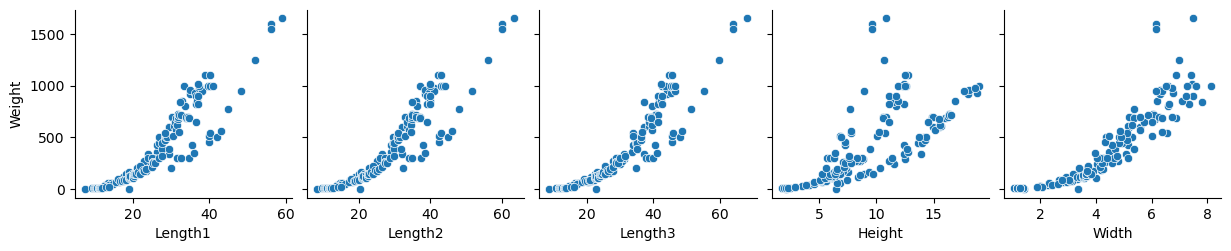

In [13]:
sb.pairplot(data=df,x_vars=['Length1','Length2','Length3','Height','Width'],y_vars=['Weight'])

In [14]:
df.corr() 

C:\Users\kanaw\AppData\Local\Temp\ipykernel_12688\3514509782.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


C:\Users\kanaw\AppData\Local\Temp\ipykernel_12688\4019506510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr())


<Axes: >

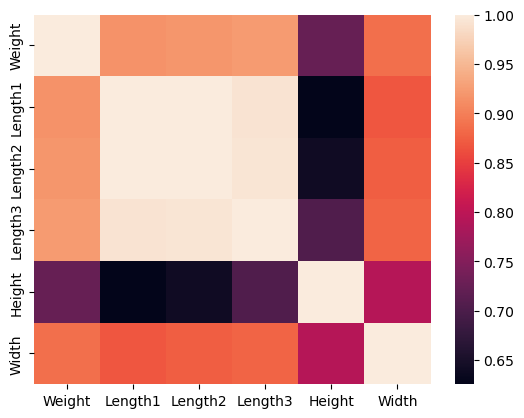

In [15]:
sb.heatmap(df.corr()) 

C:\Users\kanaw\AppData\Local\Temp\ipykernel_12688\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<Axes: >

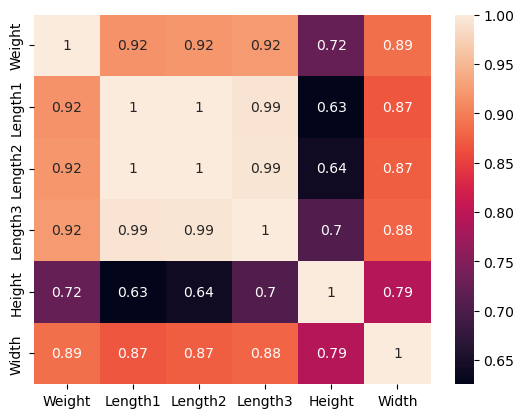

In [16]:
sb.heatmap(df.corr(),annot=True)

In [17]:
df[['Width','Weight']].describe()

,Width,Weight
count,159.000000,159.000000
mean,4.417486,398.326415
std,1.685804,357.978317
min,1.047600,0.000000
25%,3.385650,120.000000
50%,4.248500,273.000000
75%,5.584500,650.000000
max,8.142000,1650.000000


In [18]:
x=df[['Width']]
y=df[['Weight']]

In [19]:
x

,Width
0,4.0200
1,4.3056
2,4.6961
3,4.4555
4,5.1340
...,...
154,1.3936
155,1.2690
156,1.2558
157,2.0672


In [20]:
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
x_train

,Width
111,7.7957
131,4.0198
58,6.5620
102,5.1373
47,3.8000
...,...
133,3.9770
137,4.8960
72,1.4080
140,6.1712


In [24]:
y_train


,Weight
111,840.0
131,300.0
58,540.0
102,300.0
47,160.0
...,...
133,345.0
137,500.0
72,5.9
140,950.0


In [25]:
lin_model=LinearRegression()

In [26]:
lin_model.fit(x_train,y_train) 

LinearRegression()

In [27]:
m=lin_model.coef_ 
m

array([[184.4856459]])

In [29]:
c=lin_model.intercept_
c

array([-414.75862175])

In [30]:
y_pred=lin_model.predict(x_test)

In [31]:
y_pred

array([[ 803.40009816],
       [ 192.99244155],
       [ 539.17975609],
       [ 253.81735901],
       [  96.6355887 ],
       [ 641.90136373],
       [ 239.75955279],
       [ 473.46596902],
       [ 203.56346906],
       [ 290.89897383],
       [ 235.55328006],
       [ 254.1863303 ],
       [ -45.93491846],
       [ 427.63973458],
       [ 797.97622017],
       [ 322.26153364],
       [ 193.01089012],
       [ 573.16201207],
       [ 465.53308625],
       [ 367.27603124],
       [-202.89530599],
       [   3.65482316],
       [ 305.84231115],
       [ 494.27594988],
       [ 261.8424846 ],
       [ 746.02506228],
       [ 560.32181111],
       [-221.4914591 ],
       [ 718.72118669],
       [ 254.92427288],
       [ 986.55744741],
       [ 384.98665325]])

In [32]:
y_test

,Weight
29,1000.0
42,120.0
14,600.0
91,130.0
81,85.0
19,650.0
44,145.0
11,500.0
40,0.0
97,145.0


In [33]:
y_test[0:5]

,Weight
29,1000.0
42,120.0
14,600.0
91,130.0
81,85.0


In [34]:
y_pred[0:5]

array([[803.40009816],
       [192.99244155],
       [539.17975609],
       [253.81735901],
       [ 96.6355887 ]])

In [35]:
test_accuracy=r2_score(y_test,y_pred)
test_accuracy

0.712453005210171

In [36]:
mse=mean_squared_error(y_test,y_pred)
mse

38845.309153241105

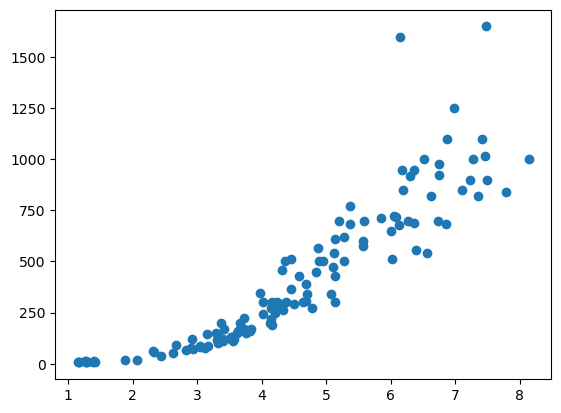

In [37]:
plt.scatter(x_train,y_train)

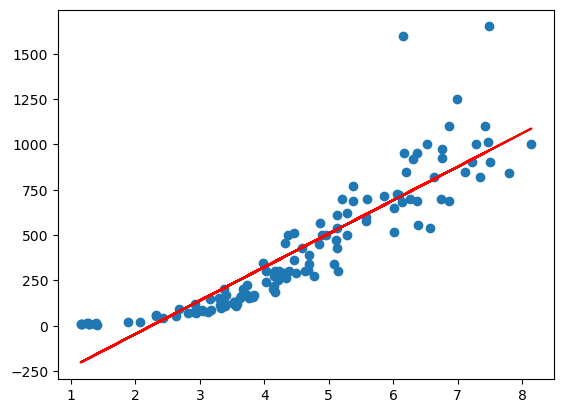

In [38]:
plt.scatter(x_train,y_train)
plt.plot(x_train,c+m*x_train,'r')
plt.show()